# Model eXtreme Gradient Boosting

- Several columns were dropped.
- Weighted model more complex.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Mental_1 = pd.read_csv('Datasheet/MH.Clean.1.csv')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
import sklearn as sk
import xgboost as xgb
from xgboost import XGBClassifier

### Data for train the model

In [4]:
X = Mental_1.drop(columns=['id', 'Depression'],axis=1)
y = Mental_1['Depression']

In [5]:
# define de model
model_stu = XGBClassifier()

In [6]:
# check the param of the model
model_stu.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [7]:
# modification of the param
params = {'base_score': [0.5],
         'booster': ['gbtree'],
         'colsample_bylevel': [1],
         'colsample_bynode': [0.6],
         'colsample_bytree': [0.7],
         'gamma': [0.01],
         'learning_rate': [0.05,0.02],
         'max_depth':[2,3,4],
         'min_child_weight': [1, 2, 3],
         'n_estimators': [400,600,800],
         'n_jobs': [-1],
         'reg_alpha': [0.1],
         'reg_lambda': [0.01,0.1],
         'scale_pos_weight': [1],
         'subsample': [0.9]}

In [8]:
scoring = ["roc_auc"]
grid_solver = GridSearchCV(estimator = model_stu,
                   param_grid = params,
                   scoring = scoring,
                   cv = 5,
                   n_jobs= -1,
                   refit="roc_auc",
                   verbose = 2)

In [9]:
# searchin for the best tree.
stu_results = grid_solver.fit(X,y)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [10]:
stu_results.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=0.6, colsample_bytree=0.7,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.01,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [11]:
dep_resoult = stu_results.best_estimator_

In [12]:
y_pred_V1_bin = dep_resoult.predict(X)
y_pred_V1_bin

array([0, 1, 0, ..., 0, 0, 1], shape=(140700,))

In [13]:
from sklearn.metrics import confusion_matrix

def confusion(ytest,y_pred):
    names=["No depresive","Depressive"]
    cm=confusion_matrix(y,y_pred_V1_bin)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

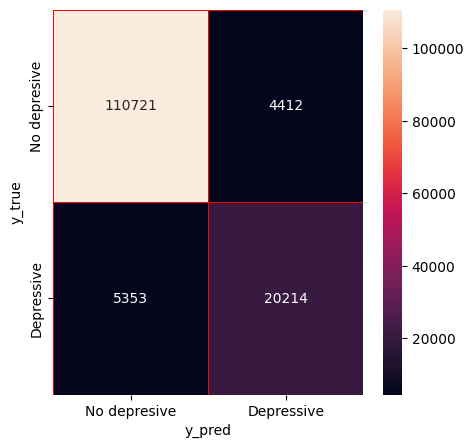

In [14]:
confusion(y,y_pred_V1_bin)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred_V1_bin)

0.9305970149253732

[CV] END base_score=0.5, booster=gbtree, colsample_bylevel=1, colsample_bynode=0.6, colsample_bytree=0.7, gamma=0.01, learning_rate=0.05, max_depth=2, min_child_weight=1, n_estimators=400, n_jobs=-1, reg_alpha=0.1, reg_lambda=0.1, scale_pos_weight=1, subsample=0.9; total time=   1.4s
[CV] END base_score=0.5, booster=gbtree, colsample_bylevel=1, colsample_bynode=0.6, colsample_bytree=0.7, gamma=0.01, learning_rate=0.05, max_depth=2, min_child_weight=1, n_estimators=600, n_jobs=-1, reg_alpha=0.1, reg_lambda=0.01, scale_pos_weight=1, subsample=0.9; total time=   2.1s
[CV] END base_score=0.5, booster=gbtree, colsample_bylevel=1, colsample_bynode=0.6, colsample_bytree=0.7, gamma=0.01, learning_rate=0.05, max_depth=2, min_child_weight=1, n_estimators=800, n_jobs=-1, reg_alpha=0.1, reg_lambda=0.01, scale_pos_weight=1, subsample=0.9; total time=   2.7s
[CV] END base_score=0.5, booster=gbtree, colsample_bylevel=1, colsample_bynode=0.6, colsample_bytree=0.7, gamma=0.01, learning_rate=0.05, max_d

### Trying to fit a better model is not the best proposition

- The best deep for the trees is only 3
- The number of estimators is only 600
- The learning rate 0.5


In [16]:
grid_solver.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=0.6, colsample_bytree=0.7,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.01,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

# apply the best estimator to Test dataframe

In [17]:
Mental_1 = pd.read_csv('Datasheet/MH.Clean.Test.1.csv')

In [18]:
Mental_1.drop(columns=['id'],axis=1)

,Gender,Age,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Pressure,Satisfaction
0,0,53.0,0,9.0,3.0,1,2.0,5.0
1,1,58.0,0,6.0,4.0,0,2.0,4.0
2,0,53.0,1,12.0,4.0,0,4.0,1.0
3,1,23.0,1,10.0,4.0,0,5.0,1.0
4,0,47.0,1,3.0,4.0,0,5.0,5.0
...,...,...,...,...,...,...,...,...
93795,1,49.0,1,2.0,2.0,1,3.0,5.0
93796,0,29.0,1,11.0,3.0,1,5.0,1.0
93797,0,24.0,0,7.0,1.0,0,1.0,4.0
93798,1,23.0,1,7.0,5.0,1,4.0,2.0


In [20]:
modelo_MH = stu_results.best_estimator_

In [21]:
modelo_MH

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=0.6, colsample_bytree=0.7,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.01,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [22]:
y_pre = modelo_MH.predict(Mental_1.drop(columns=['id'],axis=1))

In [23]:
y_pre

array([0, 0, 0, ..., 0, 1, 0], shape=(93800,))

In [ ]:
# define a threshold
# threshold = 0.5
# y_pre_bin = np.where(y_pre > threshold, 1, 0)

In [25]:
# y_pre_bin

In [26]:
Mental_1['Depression']= y_pre

In [27]:
Mental_1

,id,Gender,Age,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Pressure,Satisfaction,Depression
0,140700,0,53.0,0,9.0,3.0,1,2.0,5.0,0
1,140701,1,58.0,0,6.0,4.0,0,2.0,4.0,0
2,140702,0,53.0,1,12.0,4.0,0,4.0,1.0,0
3,140703,1,23.0,1,10.0,4.0,0,5.0,1.0,1
4,140704,0,47.0,1,3.0,4.0,0,5.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...
93795,234495,1,49.0,1,2.0,2.0,1,3.0,5.0,0
93796,234496,0,29.0,1,11.0,3.0,1,5.0,1.0,1
93797,234497,0,24.0,0,7.0,1.0,0,1.0,4.0,0
93798,234498,1,23.0,1,7.0,5.0,1,4.0,2.0,1


In [28]:
Mental_1['Depression'].value_counts()

Depression
0    77342
1    16458
Name: count, dtype: int64

In [29]:
print(Mental_1.keys())

Index(['id', 'Gender', 'Age', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Pressure', 'Satisfaction',
       'Depression'],
      dtype='object')


In [30]:
sample_submission = Mental_1.drop(columns=['Gender', 'Age', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress','Family History of Mental Illness', 'Pressure', 'Satisfaction'],axis=1)

In [31]:
sample_submission

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0
...,...,...
93795,234495,0
93796,234496,1
93797,234497,0
93798,234498,1


In [32]:
sample_submission.to_csv('sample_submission_1.5.csv', index=False)

# Score: 0.93320 

sample_submission_1.5.csv

